# Розділ набору даних

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print(f"Класи датасета: {iris.target}")

Класи датасета: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)

print(f"Классы в y_train:\n{y_train}")
print(f"Классы в y_test:\n{y_test}")

Классы в y_train:
[1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2
 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1
 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
Классы в y_test:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


#### Стратифікація (рівномірний розподіл) класів

In [6]:
import numpy as np

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [31 35 34]
Количество строк в y_test по классам: [19 15 16]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42,
                                                    stratify=y)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [34 33 33]
Количество строк в y_test по классам: [16 17 17]


#### Додаткове розділення

In [8]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [124 127 124 128 127 127 127 125 122 126]
Количество строк в y_test по классам: [54 55 53 55 54 55 54 54 52 54]


In [9]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
                                                    train_size=0.5, 
                                                    random_state=42,
                                                    stratify=y_test)

print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print(f"Количество строк в y_val по классам: {np.bincount(y_val)}")

Количество строк в y_test по классам: [27 27 27 27 27 28 27 27 26 27]
Количество строк в y_val по классам: [27 28 26 28 27 27 27 27 26 27]


___

#  Поліноміальна регресія в Python

In [18]:
import pandas as pd
x = [2, 3, 4, 5, 6, 7, 7, 8, 9, 11, 12]
y = [18, 16, 15, 17, 20, 23, 25, 28, 31, 30, 29]
df = pd.read_csv('Position_Salaries.csv')
x, y = df['Level'].values, df['Salary'].values

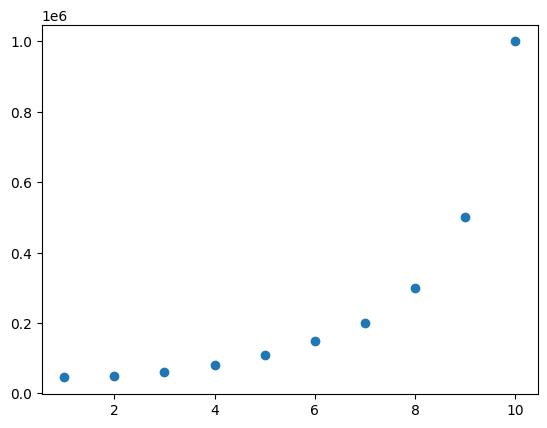

In [19]:
import matplotlib.pyplot as plt

#create scatterplot 
plt.scatter(x, y)

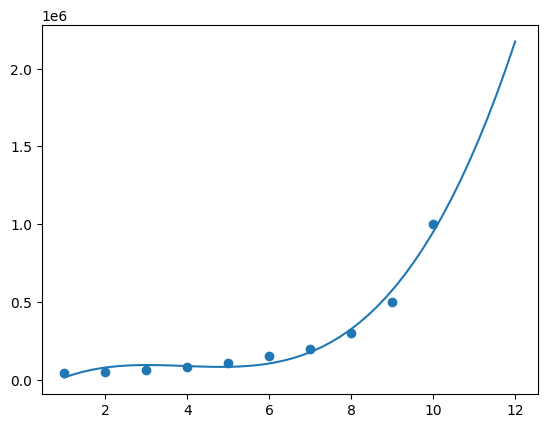

In [20]:
import numpy as np

#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(x, y, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 12, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

In [21]:
print(model)

      3             2
4120 x - 4.855e+04 x + 1.807e+05 x - 1.213e+05


In [22]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
 #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(x, y, 3)

{'r_squared': 0.9812097727913281}

___

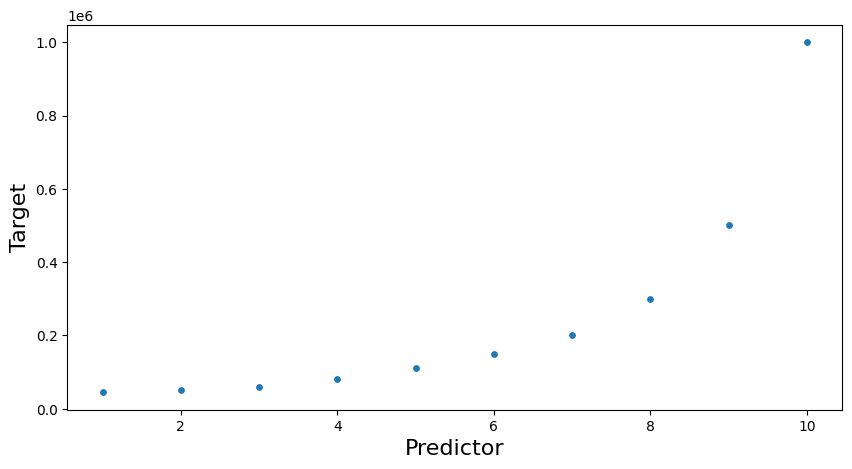

In [23]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
#x=10*np.random.normal(0,1,70)
#y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [24]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

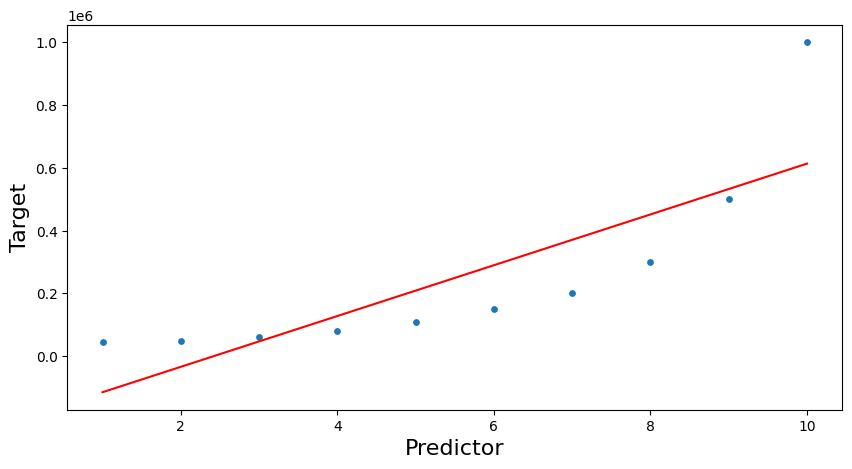

In [25]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [26]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 163388.73519272613


![Alt-текст](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr7.png "Зображення")

In [35]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

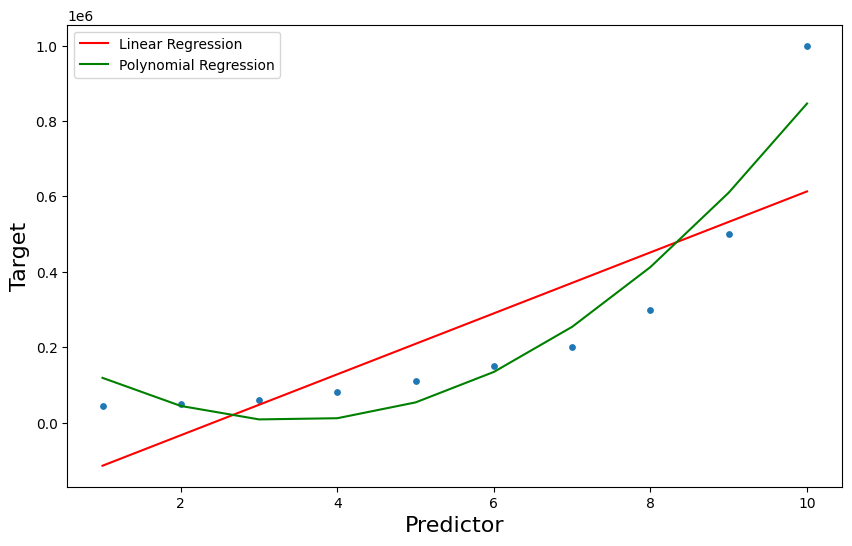

In [32]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [29]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 82212.12400451247


![Alt-текст](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr10.png "Зображення")

де:

 Y - цільова ознака,

          x1, x2 — предиктори,

          𝜃0  — зміщення,

          а 𝜃1, 𝜃2, 𝜃3, 𝜃4 и 𝜃5 — ваги в управлінні регресії

___

# Регулярізація

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [56]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


#### Linear Model trained with L1 prior as regularizer (aka the Lasso).

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.29
Lasso Regression-Test set score: 0.21


In [58]:
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 4


In [59]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("Lasso Regression-Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Regression-Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Regression-Training set score: 0.90
Lasso Regression-Test set score: 0.77


D:\MyDoc\Nextcloud\_STARTUP_ACADEMY\jupiter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [60]:
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 32


#### Linear least squares with L2 regularization

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.90
Ridge Regression-Test set score: 0.76


#### Linear regression with combined L1 and L2 priors as regularizer

In [62]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.84
Elastic Net-Test set score: 0.70


D:\MyDoc\Nextcloud\_STARTUP_ACADEMY\jupiter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
